In [2]:
#Laura Brancato (i6229390) 
#Olga Glazunova (i6369232)
#Simone Lamme (i6227946)
#Jorieke Schellekens (i6368804)
#Daphne Silvertand (i6227826) 
#Lena Strobl (i6368666)


In [ ]:
import numpy as np
import sklearn.datasets as ds
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [ ]:
# Load the dataset from your host institute
#df = pd.read_excel("IID.xlsx")
df = pd.read_excel("/content/Individual_Irregularity_Data.xlsx")

### Describe the data sets: How many features, how many samples

In [ ]:
print(df.shape)
print(df.describe)
print("Features:", list(df.columns.values))
print("Unique values:", df.nunique())

# The dataset contains 11049 samples (rows), 31 features (columns).
# Features: ['PatientId', 'RecordId', 'Creation Time', 'Diagnosis', 'Symptoms', 'Heart rate (BPM)', '# Ectopics', 'Mean Intervals (ms)',
# 'SDNN(ms)', 'SDSD(ms)', 'RMSSD(ms)', 'pNN50(%)', 'pNN20(%)', 'zerosVs(%)', 'oneVs(%)', 'twoLVs(%)', 'twoUVs(%)', 'Hstd(%)', 'zeroVm(%)',
# 'oneVm(%)', 'twoLVm(%)', 'twoUVm(%)', 'Hmm', 'zeroVb1(%)', 'oneVb1(%)', 'twoVb1(%)', 'Hb1', 'zeroVb2(%)', 'oneVb2(%)', 'twoVb2(%)', 'Hb2']
# There are 98 unique patients.

(11049, 31)
<bound method NDFrame.describe of                       PatientId                  RecordId  \
0      5e7382384cedfd0006d75897  5e7383eaec312c795957b530   
1      5e7382384cedfd0006d75897  5e739fdccaa0f948c4351a6c   
2      5e7382384cedfd0006d75897  5e74ca77caa0f9ae633cfcd5   
3      5e7382384cedfd0006d75897  5e778ff5ec312cd54a84bf9b   
4      5e7382384cedfd0006d75897  5e77c2cfec312c71dc855613   
...                         ...                       ...   
11044  5fa9514f59080100075f0624  5fb14e8c8967b82eb521b8b2   
11045  5fa9514f59080100075f0624  5fb2c4683d8a29144120655d   
11046  5fa9514f59080100075f0624  5fb3ea413d8a2986132321db   
11047  5fa9514f59080100075f0624  5fb51fd55c50ee587afd3715   
11048  5fa9514f59080100075f0624  5fb67aa78967b814d72e1754   

                Creation Time            Diagnosis               Symptoms  \
0     2020-03-19 14:38:35.000  atrial_fibrillation            no_symptoms   
1     2020-03-19 16:37:48.397  atrial_fibrillation            no_sy


## What type of machine learning problems can be identified?

In [ ]:
# We observe here two possible directions for ML application:
# 1. Classification: We can classify patients into different diagnostic categories based the "Diagnosis" feature.
# 2. Regression: We can predict "Heart rate (BPM)" based on other features of the dataset.

### How many classes/What is the value range of the target variable?

The list of diagnoses: ['atrial_fibrillation' 'sinus' 'extrasystoles_big_episode' 'tachycardia'
 'extrasystoles_frequent' 'atrial_flutter' 'extrasystoles_trigeminy'
 'tachy_episode' 'extrasystoles_trig_episode' 'extrasystoles_bigminy'
 'extrasystoles_isolated' 'brady_episode' 'bradycardia']
The number of diagnoses: 13


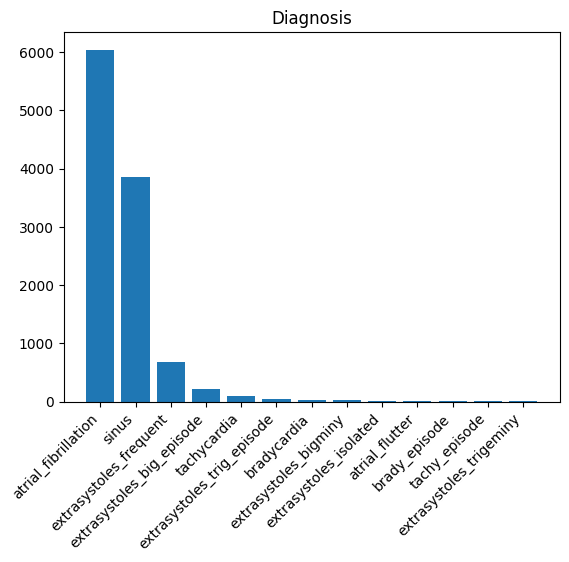

The minimal heart rate: 31
The maximal heart rate: 162


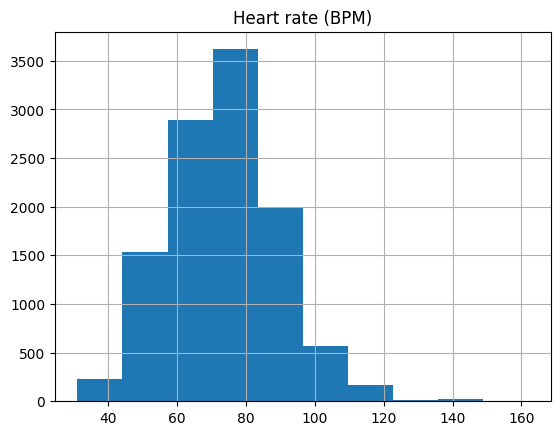

In [ ]:
#Explour target

# 1. In case of classification: Our target is "Diagnosis". It's a categorical nominal variable with 13 unique values (13 classes).
target1 = df["Diagnosis"]
print("The list of diagnoses:", target1.unique())
print("The number of diagnoses:", len(target1.unique()))
# Plotting barchart for the discrete variable "Diagnosis":
diagnosis_counts = target1.value_counts()
plt.bar(diagnosis_counts.index, diagnosis_counts.values)
plt.xticks(rotation=45, ha="right")
plt.title("Diagnosis")
plt.show()

# 2. In case of regression: Our target is "Heart rate (BPM)". It's a continuous numerical variable that ranges (in the dataset) from 31 to 162.
target2 = df["Heart rate (BPM)"]
print("The minimal heart rate:", min(target2))
print("The maximal heart rate:", max(target2))
# Plotting histogram for the continuous variable "Heart rate (BPM)":
target2.hist()
plt.title("Heart rate (BPM)")
plt.show()

## Going to Mitchell's definition of machine learning:
* What is the task *t* in this example?
* What is experience *e* in this example?
* What could be the performance measure *p*?

In [ ]:
# 1. In case of classification:
# Task T: Classify patient diagnoses ("Diagnosis") based on the features of the dataset.
# Experience E: Our dataset, that contains the features and the diagnosis for a set of patient records. (samples: 11049 (split in training and test))
# Performance P: We can use common metrics for classification evaluation, e.g., confusion metrics, ROC AUC, precision and recall


# 2. In case of regression:
# Task T: Predict a patient's heart rate ("Heart rate (BPM)") based on the features of the dataset.
# Experience E: Our dataset, that contains the features and the heart rate values for a set of patient records. (samples: 11049 (split in training and test))
# Performance P: We can use common metrics for regression evaluation, e.g., explained variance (EV), or mean squared error (MSE).z

## Try to formulate at least 3 research question for the dataset:

In [ ]:
# 1. Can patients be classified into different diagnostic categories based on their symptoms and medical data, using Ml techniques? (Classification)
# 2. Can a patient's heart rate (BPM) be predicted using their medical data and symptoms, using ML techniques? (Regression)
# 3. Can AF be predicited by using the feature 'Heart rate (BPM)' and 'Symptoms'? (Regression)